In [4]:
import pandas as pd
import numpy as np

In [ ]:
# Reading the data file

df=pd.read_csv('amazon_co-ecommerce_sample.csv',encoding = "utf-8")
df.head()

In [6]:
# Selecting the columns less than 40% null values
list_of_columns=[]
for col in df.columns:
    if((df[col].isna().mean().round(4)*100)<40):
        list_of_columns.append(col)
df=df[list_of_columns]

In [7]:
df.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_reviews
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Worth Buying For The Pictures Alone (As Ever) ...
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,**Highly Recommended!** // 5.0 // 26 May 2015 ...
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1,2,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,2,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,Birthday present // 5.0 // 14 April 2014 // By...


In [8]:
# considering only aphanumeric uniq_id, which elimates spl characters from the columns
import re
spl_charac = re.compile('[/(){}\[\]\|@,;]')
df=df.loc[(df.uniq_id.str.isalnum())] 

In [9]:
df.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_reviews
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Worth Buying For The Pictures Alone (As Ever) ...
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,**Highly Recommended!** // 5.0 // 26 May 2015 ...
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1,2,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,2,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,Birthday present // 5.0 // 14 April 2014 // By...


In [10]:
# Created the function to split the list in row to multiple rows

def explode(df, lst_cols, fill_value=''):
    if lst_cols and not isinstance(lst_cols, list):
        lst_cols = [lst_cols]
    idx_cols = df.columns.difference(lst_cols)
    lens = df[lst_cols[0]].str.len()
    if (lens > 0).all():
        return pd.DataFrame({
            col:np.repeat(df[col].values, lens)
            for col in idx_cols
        }).assign(**{col:np.concatenate(df[col].values) for col in lst_cols}) \
          .loc[:, df.columns]
    else:
        return pd.DataFrame({
            col:np.repeat(df[col].values, lens)
            for col in idx_cols
        }).assign(**{col:np.concatenate(df[col].values) for col in lst_cols}) \
          .append(df.loc[lens==0, idx_cols]).fillna(fill_value) \
          .loc[:, df.columns]

In [11]:
# viewing a particular customer review, here we can see that a particular produc review has muliple customer review items
df['customer_reviews'][0]

"Worth Buying For The Pictures Alone (As Ever) // 4.0 // 6 April 2014 // By\n    \n    Copnovelist\n  \n on 6 April 2014 // Part of the magic for me growing up as a boy was to buy (or be given) the new Hornby catalogue every year, even if it included 90% of the same products as the previous year.  I've still got my old ones dating back to the 70s and 80s somewhere.  These days the catalogue is especially informative in that it tells you the vintage of the rolling stock which is useful if you are dedicating your railway to one particular era and train company. | Amazing detail fabulous photography. // 5.0 // 11 April 2015 // By\n    \n    richard\n  \n on 11 April 2015 // Amazing detail, every credit to the photographer in this book, a worthy reference manual, as well as a sales brochure. even if you only have a passing interest in the hobby you will be transported to another time when we were all younger and in awe of the big trains. | 'Great Purchase' // 5.0 // 23 April 2014 // By\n  

In [12]:
df.fillna("",inplace=True)

In [13]:
# splitting the particular product review into multiple rows based on the customer reviews for the product.
# If there are 5 customers who reviewed a product, we would be getting 5 separate rows
df['customer_reviews1']=df.customer_reviews.str.split('|')
exploaded_df=explode(df, ['customer_reviews1'], fill_value='')
exploaded_df['txt']=exploaded_df.customer_reviews1.str.split('//',n=4)
exploaded_df['review_title']=exploaded_df.txt.apply(lambda x: x[0] if(len(x)>=0) else " ")
exploaded_df['rating']=exploaded_df.txt.apply(lambda x: x[1] if(len(x)>1) else " ")
exploaded_df['review_date']=exploaded_df.txt.apply(lambda x: x[2] if(len(x)>2) else " ")
exploaded_df['customer_name']=exploaded_df.txt.apply(lambda x: x[3] if(len(x)>3) else " ")
exploaded_df['review']=exploaded_df.txt.apply(lambda x: x[4] if(len(x)>4) else " ")

In [18]:
exploaded_df.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,...,product_description,items_customers_buy_after_viewing_this_item,customer_reviews,customer_reviews1,txt,review_title,rating,review_date,customer_name,review
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Worth Buying For The Pictures Alone (As Ever) ...,Worth Buying For The Pictures Alone (As Ever) ...,[Worth Buying For The Pictures Alone (As Ever)...,Worth Buying For The Pictures Alone (As Ever),4.0,6 April 2014,By\n \n Copnovelist\n \n on 6 April 2014,Part of the magic for me growing up as a boy ...
1,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Worth Buying For The Pictures Alone (As Ever) ...,Amazing detail fabulous photography. // 5.0 /...,"[ Amazing detail fabulous photography. , 5.0 ...",Amazing detail fabulous photography.,5.0,11 April 2015,By\n \n richard\n \n on 11 April 2015,"Amazing detail, every credit to the photograp..."
2,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Worth Buying For The Pictures Alone (As Ever) ...,'Great Purchase' // 5.0 // 23 April 2014 // B...,"[ 'Great Purchase' , 5.0 , 23 April 2014 , ...",'Great Purchase',5.0,23 April 2014,By\n \n Pinkhandbag\n \n on 23 April 2...,This was purchased on behalf of my Dad. He is...
3,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Worth Buying For The Pictures Alone (As Ever) ...,Great Catalogue // 5.0 // 11 Jun. 2014 // By\...,"[ Great Catalogue , 5.0 , 11 Jun. 2014 , By...",Great Catalogue,5.0,11 Jun. 2014,By\n \n Gary John Mapson\n \n on 11 Ju...,Everything I really needed to see what was on...
4,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Worth Buying For The Pictures Alone (As Ever) ...,I collect them all as the glossy pictures are...,[ I collect them all as the glossy pictures ar...,I collect them all as the glossy pictures are...,5.0,7 Dec. 2014,By\n \n David Baker\n \n on 7 Dec. 2014,I collect them all as the glossy pictures are...


In [19]:
exploaded_df.drop(['customer_reviews1','txt'],axis=1,inplace=True)

In [20]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    4. Returns only the alphanumeric values
    5. performed Lemma to look at the morphological analysis of each word 
    '''
    letters_only = re.sub("[^a-zA-Z0-9]", " ", text)
    nopunc = [char for char in letters_only if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    list_of_words=[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    leema_words=[WordNetLemmatizer().lemmatize(word, pos="n") for word in list_of_words]
    
    
    return (" ".join(leema_words))

def data_cleansing(corpus):
    letters_only = re.sub("[^a-zA-Z0-9]", " ", corpus) 
    return(letters_only)

In [21]:
# Performed text pre-processing on the columns

exploaded_df['review']=exploaded_df.review.apply(lambda x:text_process(x))

exploaded_df['review_title']=exploaded_df['review_title'].apply(lambda x:data_cleansing(x))
exploaded_df['customer_name']=exploaded_df['customer_name'].apply(lambda x:data_cleansing(x))
exploaded_df['customer_name']=exploaded_df.customer_name.apply(lambda x:x[x.find('          '):x.find('on')].strip())
exploaded_df['price']=exploaded_df.price.apply(lambda x:x[1:])
exploaded_df['quantity_available_in_stock']=exploaded_df.number_available_in_stock.str.split('\xa0',n=2,expand=True)[0]
exploaded_df['type_available_in_stock']=exploaded_df.number_available_in_stock.str.split('\xa0',n=2,expand=True)[1]
exploaded_df['average_review_rating']=exploaded_df.average_review_rating.apply(lambda x:x.split(" ")[0])
exploaded_df['product_name']=exploaded_df['product_name'].apply(lambda x:data_cleansing(x))
exploaded_df['product_information']=exploaded_df['product_information'].apply(lambda x:data_cleansing(x))
exploaded_df['product_description']=exploaded_df['product_description'].apply(lambda x:data_cleansing(x))
exploaded_df['description']=exploaded_df['description'].apply(lambda x:data_cleansing(x))
# df['customer_reviews']=df['customer_reviews'].apply(lambda x:data_cleansing(x))
exploaded_df['manufacturer']=exploaded_df['manufacturer'].apply(lambda x:data_cleansing(x))

In [26]:
# 2 columns with same data, removing one column replacing

# df.loc[~(df['description']==df['product_description'])]
import numpy as np
exploaded_df['description']=np.where(exploaded_df['description']=="",exploaded_df.product_description,exploaded_df.description)

exploaded_df.drop(['product_description'],axis=1,inplace=True)

exploaded_df.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,...,product_information,items_customers_buy_after_viewing_this_item,customer_reviews,review_title,rating,review_date,customer_name,review,quantity_available_in_stock,type_available_in_stock
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,3.42,5 new,15,1,4.9,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,...,Technical Details Item Weight640 g Product Dim...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Worth Buying For The Pictures Alone (As Ever) ...,Worth Buying For The Pictures Alone As Ever,4.0,6 April 2014,Copnovelist,Part magic growing boy buy given new Hornby ca...,5,new
1,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,3.42,5 new,15,1,4.9,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,...,Technical Details Item Weight640 g Product Dim...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Worth Buying For The Pictures Alone (As Ever) ...,Amazing detail fabulous photography,5.0,11 April 2015,richard,Amazing detail every credit photographer book ...,5,new
2,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,3.42,5 new,15,1,4.9,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,...,Technical Details Item Weight640 g Product Dim...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Worth Buying For The Pictures Alone (As Ever) ...,Great Purchase,5.0,23 April 2014,Pinkhandbag,purchased behalf Dad always asking look 00 gau...,5,new
3,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,3.42,5 new,15,1,4.9,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,...,Technical Details Item Weight640 g Product Dim...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Worth Buying For The Pictures Alone (As Ever) ...,Great Catalogue,5.0,11 Jun. 2014,Gary John Maps,Everything really needed see offer Hornby way ...,5,new
4,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,3.42,5 new,15,1,4.9,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,...,Technical Details Item Weight640 g Product Dim...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Worth Buying For The Pictures Alone (As Ever) ...,I collect them all as the glossy pictures are...,5.0,7 Dec. 2014,David Baker,collect glossy picture great nice still get ca...,5,new


In [28]:
exploaded_df.drop(['number_available_in_stock'],axis=1,inplace=True)

In [29]:
exploaded_df.dtypes

uniq_id                                        object
product_name                                   object
manufacturer                                   object
price                                          object
number_of_reviews                              object
number_of_answered_questions                   object
average_review_rating                          object
amazon_category_and_sub_category               object
customers_who_bought_this_item_also_bought     object
description                                    object
product_information                            object
items_customers_buy_after_viewing_this_item    object
customer_reviews                               object
review_title                                   object
rating                                         object
review_date                                    object
customer_name                                  object
review                                         object
quantity_available_in_stock 

In [30]:
# Changing the column data types for meaningful statistical analysis. 

for x in exploaded_df.columns:
    if x not in (['price','number_of_reviews','number_of_answered_questions',\
                  'average_review_rating','rating','quantity_available_in_stock']):
        exploaded_df[x]=exploaded_df[x].astype('str')
        exploaded_df[x]=exploaded_df[x].str.strip()

for x in exploaded_df.columns:
    if x  in (['price','number_of_reviews','number_of_answered_questions',\
                  'average_review_rating','rating','quantity_available_in_stock']):
#         print(x)
        exploaded_df[x]=pd.to_numeric(exploaded_df[x], errors='coerce')
        exploaded_df[x].fillna(0,inplace=True)
        exploaded_df[x]=exploaded_df[x].astype('float')
#         exploaded_df[x]=exploaded_df[x].str.strip()

In [33]:
exploaded_df.dtypes

uniq_id                                         object
product_name                                    object
manufacturer                                    object
price                                          float64
number_of_reviews                              float64
number_of_answered_questions                   float64
average_review_rating                          float64
amazon_category_and_sub_category                object
customers_who_bought_this_item_also_bought      object
description                                     object
product_information                             object
items_customers_buy_after_viewing_this_item     object
customer_reviews                                object
review_title                                    object
rating                                         float64
review_date                                     object
customer_name                                   object
review                                          object
quantity_a

In [35]:
# Created a Wordcloud to visualizate the most used words by the customers

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)

def wordcloud(col,stop):
    tmp = exploaded_df[col]
    clean_text=[]
    for each in tmp:
        clean_text.append(each)
    clean_text = ' '.join(clean_text)
    if (stop=="yes"):    
        wordcloud = WordCloud(background_color='white',
                          width=3500,
                          height=3000,stopwords = stopwords
                         ).generate(clean_text)
    else:
        wordcloud = WordCloud(background_color='black',
                          width=3500,
                          height=3000
                         ).generate(clean_text)
    print('==='*30)
    print('word cloud of '+col+' is plotted below')
    plt.figure(1,figsize=(8,8))
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [36]:
# stopwords.add('us')

word cloud of review is plotted below


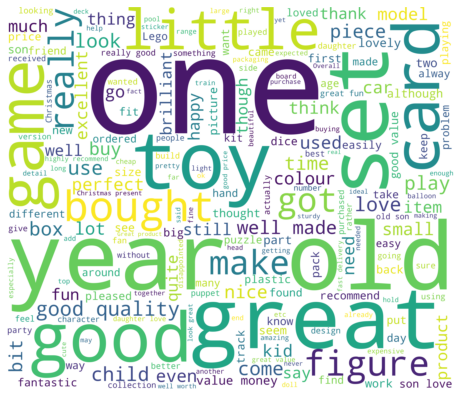

In [37]:
# Below is the word cloud for the review column
wordcloud('review','yes')

word cloud of review_title is plotted below


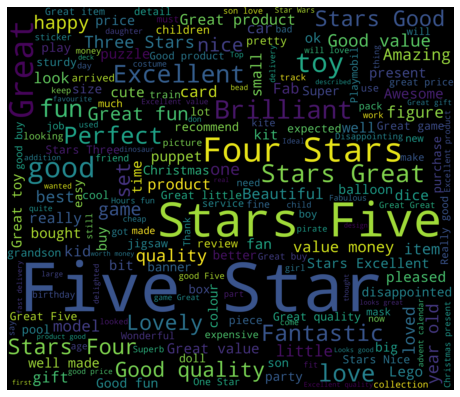

In [38]:
# Below is the word cloud for the review title column

wordcloud('review_title','no')

In [39]:
exploaded_most_cust_review=(exploaded_df.loc[exploaded_df['customer_name']!=""][['uniq_id','customer_name']]).groupby(['customer_name']).count()['uniq_id'].reset_index()
exploaded_most_cust_review=exploaded_most_cust_review.sort_values(['uniq_id'], ascending=False)
exploaded_most_cust_review.head(10)

,customer_name,uniq_id
653,Amaz,1405
5400,J,65
189,A Customer,59
12500,Pen Name,57
14290,Sim,47
7192,Kindle Customer,47
576,Alis,42
2707,D,40
19216,misery guts,37
8175,M,36


In [41]:
import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected=True)
from plotly import tools

trace1 = go.Bar(x = exploaded_most_cust_review.head(10)['customer_name'].unique().tolist()  , \
                y = exploaded_most_cust_review.head(10)['uniq_id'].unique().tolist(),
                text=exploaded_most_cust_review.head(10)['uniq_id'].unique().tolist(),textposition='auto',
                marker = dict(line = dict(width = .5,color = "black")),
                hoverinfo="name+y+text",
                opacity = .9)


layout = go.Layout(dict(
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "Customers",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "Review Counts",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                       )
                  )
data = [trace1]
fig  = go.Figure(data=data,layout=layout)
py.offline.iplot(fig)

# Below graph dscribes the top 10 customers based on the number of reviews


In [60]:
# This dataframe decribes the average rating for the above cusotmers

exploaded_avg_cust_review=(exploaded_df.loc[exploaded_df['customer_name']!=""][['rating','customer_name']]).groupby(['customer_name']).mean()['rating'].reset_index()
exploaded_avg_cust_review=exploaded_avg_cust_review.sort_values(['rating'])
exploaded_avg_cust_review.loc[exploaded_avg_cust_review.customer_name.isin(exploaded_most_cust_review.head(10)['customer_name'].unique().tolist())]

# exploaded_df[['customer_name','rating']].groupby(['customer_name']).mean()['rating']

,customer_name,rating
8175,M,4.250000
7192,Kindle Customer,4.276596
12500,Pen Name,4.315789
653,Amaz,4.549466
576,Alis,4.619048
2707,D,4.650000
5400,J,4.676923
14290,Sim,4.680851
189,A Customer,4.745763
19216,misery guts,4.945946


In [42]:
# import plotly as py
# import plotly.graph_objs as go
# py.offline.init_notebook_mode(connected=True)
# from plotly import tools

def countplot(len=10):
    
    trace=[]    
    for a,y in zip(['#81D8D0','#81F79F','#FFFF00','#F5D0A9','#F7819F'],['number_of_answered_questions','quantity_available_in_stock','rating','number_of_reviews','price']):
                
        trace.append( go.Histogram(x=exploaded_df[y],histnorm='percent',
            name=y,
            xbins=dict(
                start=1,
                end=len,
                size=1
            ),
             marker={'color': a,'line':{'color':'rgb(18,28,107)','width':0.3}},
            opacity=0.75))


    fig = tools.make_subplots(rows=5, cols=1, shared_xaxes=True)

#     print(trace[0])
    fig.append_trace(trace[0], 1, 1)
    fig.append_trace(trace[1],2,1)
    fig.append_trace(trace[2], 3,1)
    fig.append_trace(trace[3], 4,1)
    fig.append_trace(trace[4], 5,1) 
    fig['layout'].update(height=900, width=900)
    py.offline.iplot(fig, filename='basic histogram')

In [43]:
# Below graph describes the nuumerical attributes and their data distribution 
countplot()

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x1,y2 ]
[ (3,1) x1,y3 ]
[ (4,1) x1,y4 ]
[ (5,1) x1,y5 ]

